<a href="https://colab.research.google.com/github/nafis-git/data_science_path/blob/main/projects/Analyzing__Crime_LosAngeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World!

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [150]:
crimes  = pd.read_feather('https://raw.githubusercontent.com/nafis-git/data_science_path/main/data/crimes.p')
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,None,None,None,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,None,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,None,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,None,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,None,Invest Cont,6200 4TH AV


In [77]:
crimes.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                object
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
dtype: object

In [151]:
crimes["Date Rptd"]  = pd.to_datetime(crimes["Date Rptd"])
crimes["DATE OCC"]  = pd.to_datetime(crimes["DATE OCC"])
crimes['TIME OCC'] = crimes['TIME OCC'].astype(str)

Explore the crimes.csv dataset and use your findings to answer the following questions:  

- Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.
- Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.
- Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+). Save as a pandas Series called victim_ages.

In [152]:
# Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.
# convert crimes['TIME OCC'] to time objects
crimes['hour'] = pd.to_datetime(crimes['TIME OCC'], format = '%H%M', errors='coerce').dt.hour
# find frequency of the crimes for each hour
peak_crime_hour = crimes['hour'].value_counts().nlargest(1).index[0]
peak_crime_hour

12.0

In [101]:
crimes['hour'].unique()

array([17., 11., 16., 12.,  6.,  9., 10., 13., nan, 15., 21.,  7.,  5.,
       18., 19., 23., 14.,  8.,  1., 20., 22.,  2.,  3.,  4.])

In [105]:
# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location
night_crime = crimes.query('(hour > 21) | (hour < 4)')
night_crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,hour
39,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,None,Invest Cont,6600 S BROADWAY,23.0
67,221413552,2022-06-24,2020-03-18,2330,Pacific,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,27,F,C,None,Invest Cont,S SEPULVEDA BL,23.0
71,222012073,2022-07-05,2020-06-10,10,Olympic,"BUNCO, GRAND THEFT",45,M,A,None,Invest Cont,1800 S WESTERN AV,1.0
132,220715286,2022-10-13,2020-06-01,2359,Wilshire,DISTURBING THE PEACE,59,F,W,None,Invest Cont,100 S FLORES ST,23.0
161,221225797,2022-12-22,2020-12-22,220,77th Street,VEHICLE - STOLEN,0,None,None,None,Invest Cont,6900 S FIGUEROA ST,22.0


In [109]:
peak_night_crime_location = night_crime['AREA NAME'].value_counts().nlargest(1).index[0]
peak_night_crime_location

'Central'

In [153]:
#Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+). Save as a pandas Series called victim_ages.
age_group =['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
bins = [0,17,25,34,44,54,64,np.inf]
crimes ['age_cat'] = pd.cut(crimes['Vict Age'], labels= age_group, bins = bins)

In [161]:
victim_ages = crimes ['age_cat'].value_counts()
victim_ages.sort_values().index
order_vicitms = ['0-17', '65+', '55-64', '18-25', '45-54', '35-44', '26-34']

<Axes: xlabel='age_cat', ylabel='count'>

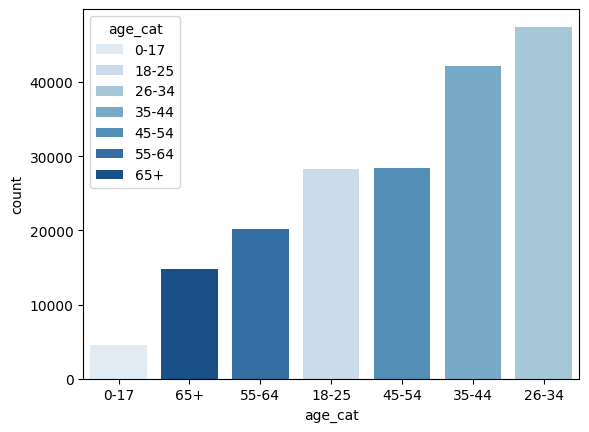

In [162]:
sns.countplot(data = crimes, x = 'age_cat', order = order_vicitms, hue = 'age_cat', palette = 'Blues')

To have a better coloring which maches the numbers vicitims in each catregory, e can  reorder the DataFrame based on the 'Category' column in the specified order. The pd.Categorical()

In [163]:
#  Convert the 'Category' column to a Categorical data type with the desired order
crimes['age_cat'] = pd.Categorical(crimes['age_cat'], categories=order_vicitms, ordered=True)
crimes = crimes.sort_values(by='age_cat')

<Axes: xlabel='age_cat', ylabel='count'>

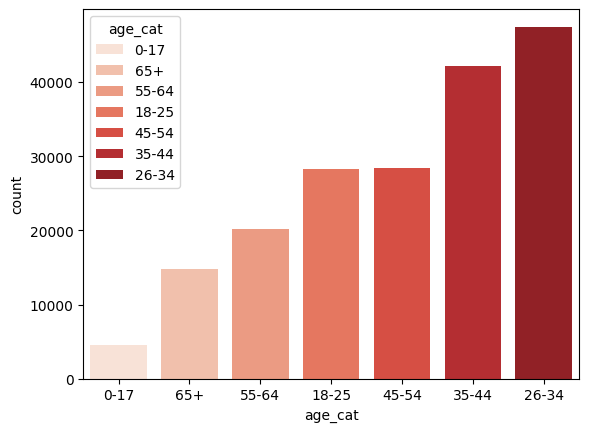

In [165]:
sns.countplot(data = crimes, x = 'age_cat',hue = 'age_cat', palette = 'Reds')

In [166]:
# Example of chnaging category of a catagoricla column
import pandas as pd

# Example DataFrame
data = {
    'Category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Value': [1, 2, 3, 4, 5, 6, 7, 8, 9]
}

df = pd.DataFrame(data)

# Define the specific order
order = ['B', 'C', 'A']  # Define the desired order

# Convert the 'Category' column to a Categorical data type with the desired order
df['Category'] = pd.Categorical(df['Category'], categories=order, ordered=True)

# Reorder the DataFrame based on the 'Category' column
df = df.sort_values(by='Category')

print(df)


  Category  Value
1        B      2
4        B      5
7        B      8
2        C      3
5        C      6
8        C      9
0        A      1
3        A      4
6        A      7
